In [2]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

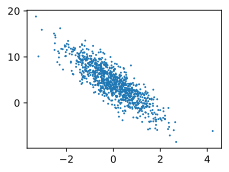

In [3]:
#生成数据集
def synthetic_data(w,b,num_examples):
    """生成y=Xw+b+噪声"""
    X=torch.normal(0,1,(num_examples,len(w))) #创建均值为0，方差为1，大小为num_examples×len(w)的随机数矩阵
    y=torch.matmul(X,w)+b
    y+=torch.normal(0,0.01,y.shape)
    return X,y.reshape((-1,1))

true_w=torch.tensor([2, -3.4])
true_b=4.2
features,labels=synthetic_data(true_w,true_b,1000)

d2l.set_figsize()
d2l.plt.scatter(features[:,1].detach().numpy(),labels.detach().numpy(),1)

In [4]:
#读取数据集，随机采样
def data_iter(batch_size,features,labels):
    num_examples=len(features)
    indices=list(range(num_examples))
    random.shuffle(indices)
    for i in range(0,num_examples,batch_size):
        batch_indices=torch.tensor(indices[i:min(i+batch_size,num_examples)])
        yield features[batch_indices],labels[batch_indices]

batch_size=10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break


tensor([[-0.9117, -1.4206],
        [-0.9822,  0.9636],
        [-0.5401,  1.2302],
        [-1.3285, -0.1953],
        [-0.4082, -0.4810],
        [ 0.3933,  1.3687],
        [ 0.6253, -0.6319],
        [ 0.1266, -0.4004],
        [-1.7228, -2.3867],
        [-1.0599, -0.3327]]) 
 tensor([[ 7.2266],
        [-1.0445],
        [-1.0653],
        [ 2.2110],
        [ 5.0294],
        [ 0.3361],
        [ 7.5744],
        [ 5.8333],
        [ 8.8675],
        [ 3.2075]])


In [8]:
#定义初始化模型参数k
w=torch.normal(0,0.01,size=(2,1),requires_grad=True)
b=torch.zeros(1,requires_grad=True)
#定义模型
def linreg(X,w,b):
    """线性回归模型"""
    return torch.matmul(X,w)+b
#定义损失函数
def squared_loss(y_hat,y):
    return(y_hat-y.reshape(y_hat.shape))**2/2
#定义优化算法
def sgd(params,lr,batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param-=lr*param.grad/batch_size
            param.grad.zero_()

#训练过程
lr=0.01
num_epochs=10
net=linreg
loss=squared_loss
for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l=loss(net(X,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l=loss(net(features,w,b),labels)
        print(f'epoch{epoch+1},loss{float(train_l.mean()):f}')

epoch1,loss2.177101
epoch2,loss0.283859
epoch3,loss0.037439
epoch4,loss0.005019
epoch5,loss0.000717
epoch6,loss0.000140
epoch7,loss0.000062
epoch8,loss0.000051
epoch9,loss0.000049
epoch10,loss0.000049


In [94]:
print(f'w的估计误差:{true_w-w.reshape(true_w.shape)}')
print(f'b的估计误差:{true_b-b}')

w的估计误差:tensor([ 0.0976, -0.1595], grad_fn=<SubBackward0>)
b的估计误差:tensor([0.1934], grad_fn=<RsubBackward1>)
